In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('Flight_Price data.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2025 01:10,2h 50m,non-stop,No info,3897
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10/06/2025 04:25,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum() # null values of column

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [9]:
null_indices = df[df['Total_Stops'].isnull()].index.tolist()
print(null_indices)


[9039]


In [10]:
null_rows = df[df['Total_Stops'].isnull()]
print(null_rows)


        Airline Date_of_Journey Source Destination Dep_Time      Arrival_Time  \
9039  Air India      06/05/2019  Delhi      Cochin    09:45  07/05/2025 09:25   

     Duration Total_Stops  Price  
9039  23h 40m         NaN   7480  


In [11]:
df['Total_Stops'] = df['Total_Stops'].fillna('2 stops')


In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [12]:
df['Duration_in_minutes'] = df['Duration'].apply(lambda x: sum([int(s.replace('h',''))*60 if 'h' in s else int(s.replace('m','')) for s in x.split()]))

In [13]:
stop_map = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}
df['Number_of_Stops'] = df['Total_Stops'].map(stop_map)

In [14]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')

In [15]:
print(df['Arrival_Time'].head(10))

0    22/03/2025 01:10
1               13:15
2    10/06/2025 04:25
3               23:30
4               21:35
5               11:25
6    13/03/2025 10:25
7    02/03/2025 05:05
8    13/03/2025 10:25
9               19:15
Name: Arrival_Time, dtype: object


In [16]:
import numpy as np

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Duration_in_minutes,Number_of_Stops
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,22/03/2025 01:10,2h 50m,non-stop,3897,170,0
1,Air India,2019-05-01,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,445,2
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25,10/06/2025 04:25,19h,2 stops,13882,1140,2
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,325,1
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,285,1


In [17]:
df['arrival_date'] = np.nan
df['arrival_time'] = np.nan


mask_datetime = df['Arrival_Time'].str.contains(r'\d{2}/\d{2}/\d{4}', na=False)


split_df = df.loc[mask_datetime, 'Arrival_Time'].str.split(' ', n=1, expand=True)
df.loc[mask_datetime, 'arrival_date'] = split_df[0]
df.loc[mask_datetime, 'arrival_time'] = split_df[1]


df.loc[~mask_datetime, 'arrival_time'] = df.loc[~mask_datetime, 'Arrival_Time']


df['arrival_date'] = pd.to_datetime(df['arrival_date'], dayfirst=True, errors='coerce').dt.date
df['arrival_time'] = pd.to_datetime(df['arrival_time'], errors='coerce').dt.time

C:\Users\Mansi\AppData\Local\Temp\ipykernel_2788\591442995.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['22/03/2025' '10/06/2025' '13/03/2025' ... '28/06/2025' '28/05/2025'
 '13/03/2025']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask_datetime, 'arrival_date'] = split_df[0]
C:\Users\Mansi\AppData\Local\Temp\ipykernel_2788\591442995.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['01:10' '04:25' '10:25' ... '19:00' '04:25' '21:20']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask_datetime, 'arrival_time'] = split_df[1]
C:\Users\Mansi\AppData\Local\Temp\ipykernel_2788\591442995.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensur

In [18]:
df['Arrival_Time'].value_counts()

Arrival_Time
19:00               423
21:00               360
19:15               333
16:10               154
12:35               122
                   ... 
28/06/2025 00:50      1
07/06/2025 22:40      1
10/03/2025 06:50      1
19/03/2025 00:05      1
13/03/2025 21:20      1
Name: count, Length: 1343, dtype: int64

In [19]:
df.drop(['Arrival_Time', 'Duration'], axis=1, inplace=True)

In [20]:
df.drop(['Total_Stops'], axis=1, inplace=True)

In [20]:
print(type(df['arrival_date'].iloc[0]))


<class 'datetime.date'>


In [21]:
df['arrival_day'] = df['arrival_date'].apply(lambda d: d.strftime('%m-%d') if pd.notnull(d) else '')

In [22]:
# Combine date and departure time to datetime
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.time
df['Departure_datetime'] = df.apply(lambda row: pd.Timestamp.combine(row['Date_of_Journey'], row['Dep_Time']), axis=1)

# Calculate correct arrival datetime using departure + duration
df['arrival_datetime'] = df['Departure_datetime'] + pd.to_timedelta(df['Duration_in_minutes'], unit='m')

# Extract day and arrival time
df['arrival_day'] = df['arrival_datetime'].dt.strftime('%d-%m')
df['arrival_time'] = df['arrival_datetime'].dt.strftime('%H:%M:%S')
df['arrival_date'] = df['arrival_datetime'].dt.date

In [23]:
df['Date_of_Journey'] = df['Date_of_Journey'].astype(str)


In [24]:
# drop intermediate columns 
df.drop(['Departure_datetime', 'arrival_datetime', 'arrival_day'], axis=1, inplace=True)

In [25]:
df.isnull().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Dep_Time               0
Total_Stops            0
Price                  0
Duration_in_minutes    0
Number_of_Stops        0
arrival_date           0
arrival_time           0
dtype: int64

In [26]:
print(df['Airline'].value_counts()) # counts per airline

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


In [27]:
print(df['Source'].value_counts()) # counts per source

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64


In [28]:
print(df.nunique())

Airline                  12
Date_of_Journey          40
Source                    5
Destination               6
Dep_Time                222
Total_Stops               5
Price                  1870
Duration_in_minutes     368
Number_of_Stops           5
arrival_date             92
arrival_time            224
dtype: int64


In [29]:
# Average Price per Airline
print(df.groupby('Airline')['Price'].mean())

Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64


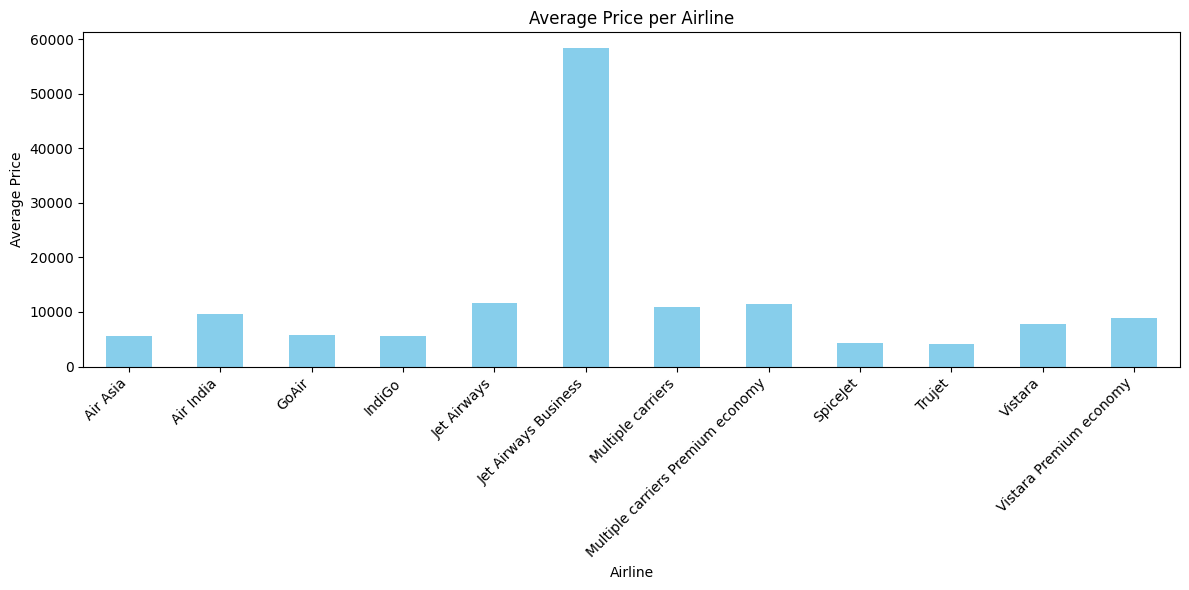

In [30]:
import matplotlib.pyplot as plt

avg_prices = df.groupby('Airline')['Price'].mean()
avg_prices.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.ylabel('Average Price')
plt.title('Average Price per Airline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# Count flights per route
print(df.groupby(['Source', 'Destination']).size().sort_values(ascending=False))


Source    Destination
Delhi     Cochin         4537
Kolkata   Banglore       2871
Banglore  Delhi          1265
          New Delhi       932
Mumbai    Hyderabad       697
Chennai   Kolkata         381
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

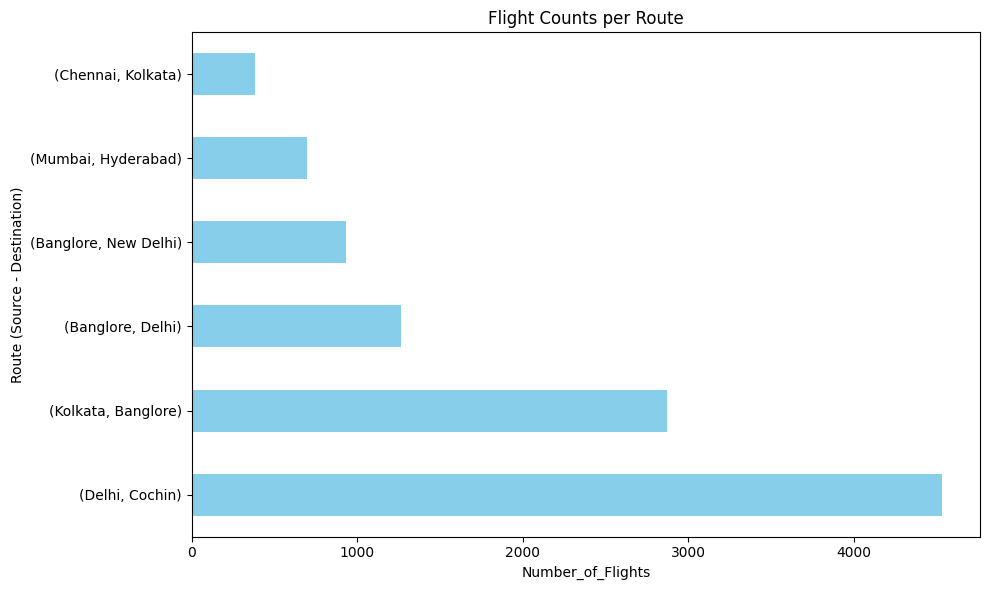

In [32]:
import matplotlib.pyplot as plt

route_counts = df.groupby(['Source', 'Destination']).size().sort_values(ascending=False)
route_counts.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Number_of_Flights')
plt.ylabel('Route (Source - Destination)')
plt.title('Flight Counts per Route')
plt.tight_layout()
plt.show

In [34]:
# min/max Duration per Airline
print(df.groupby('Airline')['Duration_in_minutes'].agg(['min', 'max']).reset_index())

                              Airline  min   max
0                            Air Asia  150   955
1                           Air India    5  2480
2                               GoAir  155   555
3                              IndiGo   85   985
4                         Jet Airways   80  2860
5                Jet Airways Business  280   500
6                   Multiple carriers  375   935
7   Multiple carriers Premium economy  395   900
8                            SpiceJet   80   520
9                              Trujet  195   195
10                            Vistara  135  1750
11            Vistara Premium economy  135   170


In [35]:
# Top 10 Most Expensive Flight
print(df.sort_values('Price', ascending=False).head(10))

                    Airline Date_of_Journey    Source Destination  Dep_Time  \
2924   Jet Airways Business      2019-03-01  Banglore   New Delhi  05:45:00   
5372   Jet Airways Business      2019-03-01  Banglore   New Delhi  05:45:00   
10364  Jet Airways Business      2019-03-01  Banglore   New Delhi  09:45:00   
5439            Jet Airways      2019-03-01  Banglore   New Delhi  16:55:00   
2618            Jet Airways      2019-03-18  Banglore   New Delhi  22:50:00   
1478            Jet Airways      2019-03-18  Banglore   New Delhi  18:40:00   
9715   Jet Airways Business      2019-03-06     Delhi      Cochin  20:05:00   
657    Jet Airways Business      2019-03-01  Banglore   New Delhi  05:45:00   
7351   Jet Airways Business      2019-03-03     Delhi      Cochin  20:05:00   
396       Multiple carriers      2019-03-01     Delhi      Cochin  12:50:00   

       Price  Duration_in_minutes  Number_of_Stops arrival_date arrival_time  
2924   79512                  340                1 

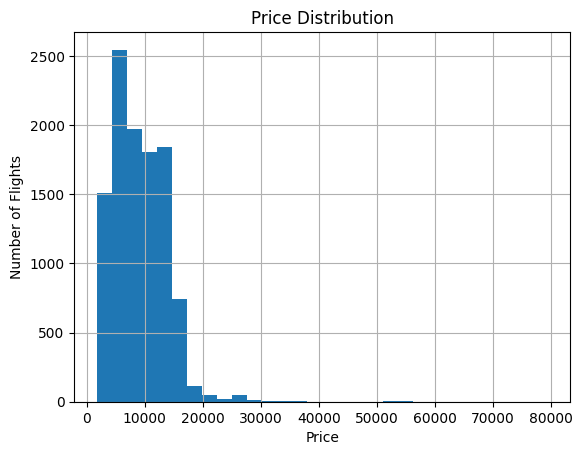

In [36]:
import matplotlib.pyplot as plt

df['Price'].hist(bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Flights')
plt.show()


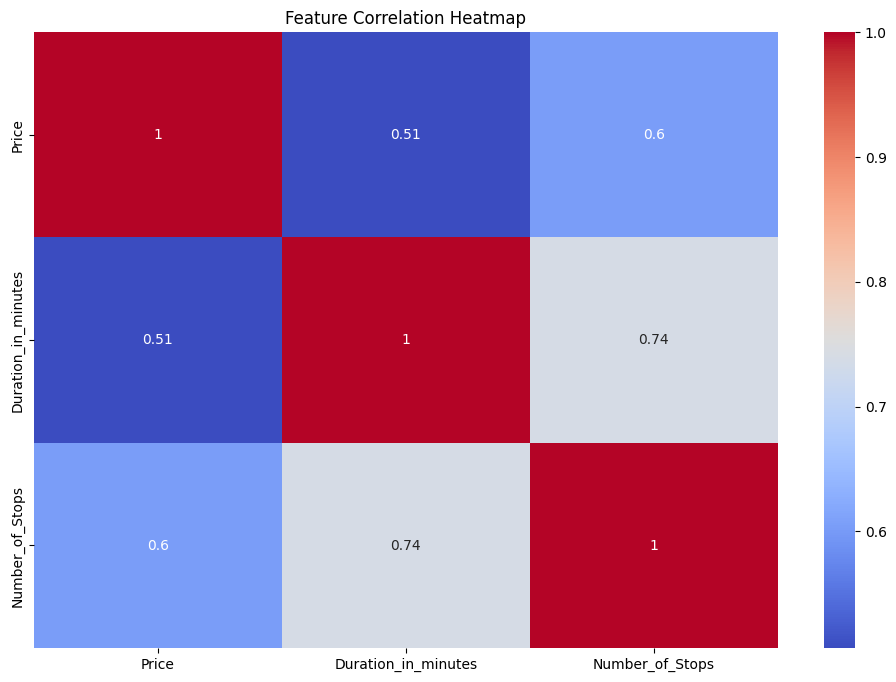

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8)) 
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


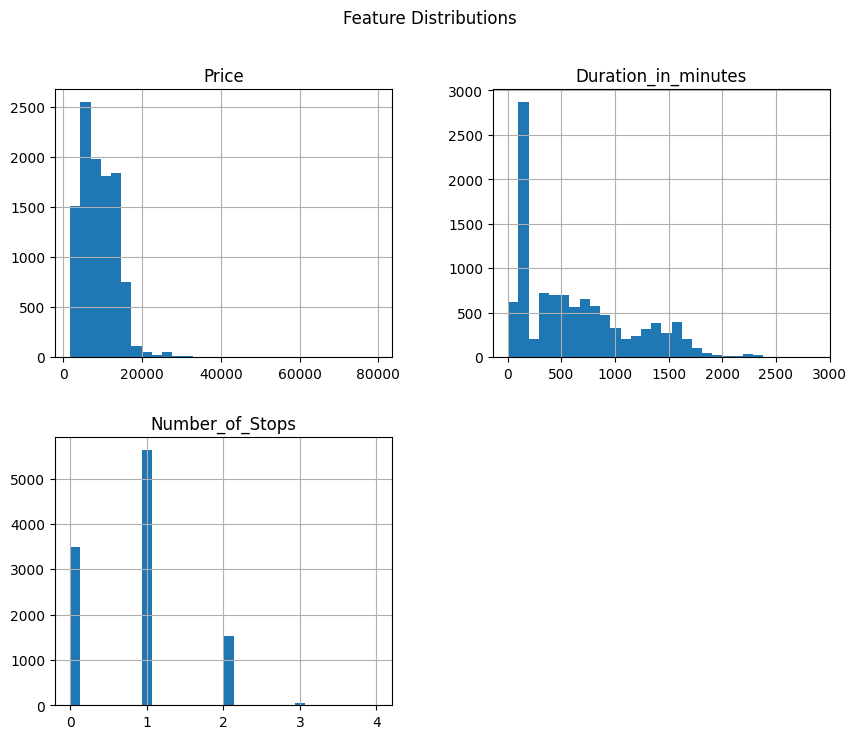

In [38]:
df[['Price', 'Duration_in_minutes', 'Number_of_Stops']].hist(bins=30, figsize=(10,8))
plt.suptitle('Feature Distributions')
plt.show()

In [33]:
df['Journey_year'] = pd.to_datetime(df['Date_of_Journey']).dt.year
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day

In [34]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M:%S').dt.hour
df['Dep_minute'] = pd.to_datetime(df['Dep_Time'], format='%H:%M:%S').dt.minute


In [35]:
df['Arr_hour'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S').dt.hour
df['Arr_minute'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S').dt.minute


In [36]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Duration_in_minutes,Number_of_Stops,arrival_date,arrival_time,Journey_year,Journey_month,Journey_day,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20:00,non-stop,3897,170,0,2019-03-25,01:10:00,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,05:50:00,2 stops,7662,445,2,2019-05-01,13:15:00,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25:00,2 stops,13882,1140,2,2019-06-10,04:25:00,2019,6,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05:00,1 stop,6218,325,1,2019-05-12,23:30:00,2019,5,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50:00,1 stop,13302,285,1,2019-03-01,21:35:00,2019,3,1,16,50,21,35


In [37]:
df.drop(['Date_of_Journey', 'Dep_Time', 'arrival_date', 'arrival_time'], axis=1, inplace=True)
df


,Airline,Source,Destination,Total_Stops,Price,Duration_in_minutes,Number_of_Stops,Journey_year,Journey_month,Journey_day,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,170,0,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,445,2,2019,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,1140,2,2019,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,325,1,2019,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,285,1,2019,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,150,0,2019,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,non-stop,4145,155,0,2019,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,non-stop,7229,180,0,2019,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,non-stop,12648,160,0,2019,3,1,11,30,14,10


In [38]:
df.to_csv('Cleaned_Flight_price data.csv', index=False)

In [39]:
dF = pd.read_csv('Cleaned_Flight_price data.csv')
dF.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_in_minutes,Number_of_Stops,Journey_year,Journey_month,Journey_day,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,170,0,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,445,2,2019,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,1140,2,2019,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,325,1,2019,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,285,1,2019,3,1,16,50,21,35


In [58]:
print(df.nunique())

Airline                  12
Source                    5
Destination               6
Total_Stops               5
Price                  1870
Duration_in_minutes     368
Number_of_Stops           5
Journey_year              1
Journey_month             4
Journey_day              10
Dep_hour                 24
Dep_minute               12
Arr_hour                 24
Arr_minute               12
dtype: int64


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
nominal_data = ['Source', 'Destination', 'Airline'] #OHE
scaling_cols = ['Duration_in_minutes', 'Number_of_Stops', 'Journey_year', 'Journey_month', 'Journey_day', 'Dep_hour', 'Dep_minute', 'Arr_hour', 'Arr_minute']

# Define transformations
preprocessor = ColumnTransformer(
    transformers = [
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_data), 
        ('scaler', StandardScaler(), scaling_cols)
    ]
)


In [41]:
X = dF.drop('Price', axis='columns')


In [42]:
y = dF.Price


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
X_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops',
       'Duration_in_minutes', 'Number_of_Stops', 'Journey_year',
       'Journey_month', 'Journey_day', 'Dep_hour', 'Dep_minute', 'Arr_hour',
       'Arr_minute'],
      dtype='object')

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor()
}
from sklearn.pipeline import Pipeline
pipelines = {}
for name , model in models.items():
    pipelines[name] = Pipeline([
        ('preprocessor', preprocessor),
        ('Regressor', model)
    ])

In [47]:
import sklearn
print(sklearn.__version__)


1.7.1


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

for name, pipeline in pipelines.items():
    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train)
    # Predict on test set
    y_pred = pipeline.predict(X_test)
    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f" MAE = {mae:.2f}")
    print(f" MSE = {mse:.2f}")
    print(f" RMSE = {rmse:.2f}")
    print(f" R^2 = {r2:.3f}")
    
    # Cross-validation (on entire training data, 5 folds)
    cv_mae = -cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    cv_mse = -cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_rmse = np.sqrt(-cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    cv_r2 = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=5)
    
    print(f"  CV MAE mean  = {cv_mae.mean():.2f} (std: {cv_mae.std():.2f})")
    print(f"  CV MSE mean  = {cv_mse.mean():.2f} (std: {cv_mse.std():.2f})")
    print(f"  CV RMSE mean = {cv_rmse.mean():.2f} (std: {cv_rmse.std():.2f})")
    print(f"  CV R^2 mean  = {cv_r2.mean():.3f} (std: {cv_r2.std():.3f})")
    print("-"*40)


Model: Linear Regression
 MAE = 1968.36
 MSE = 7882371.20
 RMSE = 2807.56
 R^2 = 0.614


c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zer

  CV MAE mean  = 1960.80 (std: 44.24)
  CV MSE mean  = 8187875.94 (std: 1089322.52)
  CV RMSE mean = 2855.18 (std: 189.27)
  CV R^2 mean  = 0.619 (std: 0.026)
----------------------------------------
Model: Random Forest Regressor
 MAE = 1176.58
 MSE = 3955689.01
 RMSE = 1988.89
 R^2 = 0.806


c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zer

  CV MAE mean  = 1196.11 (std: 39.18)
  CV MSE mean  = 4299868.06 (std: 849987.14)
  CV RMSE mean = 2078.28 (std: 222.11)
  CV R^2 mean  = 0.800 (std: 0.021)
----------------------------------------
Model: XGB Regressor
 MAE = 1159.68
 MSE = 3154842.75
 RMSE = 1776.19
 R^2 = 0.846


c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


  CV MAE mean  = 1206.08 (std: 51.93)
  CV MSE mean  = 3838450.25 (std: 958848.38)
  CV RMSE mean = 1944.02 (std: 243.36)
  CV R^2 mean  = 0.824 (std: 0.029)
----------------------------------------


c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [49]:
import mlflow

In [50]:
mlflow.set_experiment("Flight_Price_Prediction_Exp")

<Experiment: artifact_location='mlflow-artifacts:/744799212928999168', creation_time=1756053107941, experiment_id='744799212928999168', last_update_time=1756053107941, lifecycle_stage='active', name='Flight_Price_Prediction_Exp', tags={}>

In [ ]:
# mlflow ui (must)

In [51]:
import mlflow

mlflow.set_tracking_uri("file:///C:/Users/Mansi/.vscode/Flight & Customer Prediction/mlruns")



In [52]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [54]:
import mlflow
import mlflow.sklearn

for name, pipeline in pipelines.items():
    with mlflow.start_run(run_name=name):  # Each run is named after the model
        # Train and predict with pipeline
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Log parameters and metrics
        mlflow.log_param("model_type", name)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)
        
        # Log the pipeline object itself
        mlflow.sklearn.log_model(pipeline, artifact_path=name)
        
        # Optionally: Log cross-validation metrics
        cv_mae = -cross_val_score(pipeline, X_train, y_train, 
                                  scoring='neg_mean_absolute_error', cv=5)
        mlflow.log_metric("CV_MAE_mean", cv_mae.mean())
        mlflow.log_metric("CV_MAE_std", cv_mae.std())

2025/09/03 17:12:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/03 17:12:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


🏃 View run Linear Regression at: http://127.0.0.1:5000/#/experiments/744799212928999168/runs/0cc4974b97004a85be176d7bcb4ac559
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/744799212928999168


2025/09/03 17:12:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/03 17:12:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


🏃 View run Random Forest Regressor at: http://127.0.0.1:5000/#/experiments/744799212928999168/runs/2ee7e925ae284e4bafc42a0e6e496475
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/744799212928999168


2025/09/03 17:12:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/03 17:12:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGB Regressor at: http://127.0.0.1:5000/#/experiments/744799212928999168/runs/a779ab66bd8f416e9c3d398139793c77
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/744799212928999168


c:\Users\Mansi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [55]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import pickle




In [56]:
model = pipelines['XGB Regressor']


In [57]:


# Write all models to a single pickle file
with open('models.pkl', 'wb') as f:
    pickle.dump(model, f)

In [100]:
df.columns

Index(['Price', 'Duration_in_minutes', 'Number_of_Stops', 'Journey_year',
       'Journey_month', 'Journey_day', 'Dep_hour', 'Dep_minute', 'Arr_hour',
       'Arr_minute', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')